In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd

[autoreload of LoopForest failed: Traceback (most recent call last):
  File "/Users/renkin/Documents/coding/Signatures/LoopForest/.venv/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 314, in check
    superreload(
    ~~~~~~~~~~~^
        m,
        ^^
    ...<3 lines>...
        import_from_tracker=import_from_tracker,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    )
    ^
  File "/Users/renkin/Documents/coding/Signatures/LoopForest/.venv/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 621, in superreload
    update_generic(old_obj, new_obj)
    ~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^
  File "/Users/renkin/Documents/coding/Signatures/LoopForest/.venv/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 447, in update_generic
    update(a, b)
    ~~~~~~^^^^^^
  File "/Users/renkin/Documents/coding/Signatures/LoopForest/.venv/lib/python3.13/site-packages/IPython/extensions/autoreload.py", line 415, in update_class
    update_inst

In [11]:
#LoopForest.py needs to be in same directory
from LoopForest import LoopForest

In [12]:
%load_ext autoreload
%autoreload 3

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example use case

(np.float64(-0.9294863295089559),
 np.float64(1.237466671814912),
 np.float64(-1.1445137925377835),
 np.float64(1.1665718583232616))

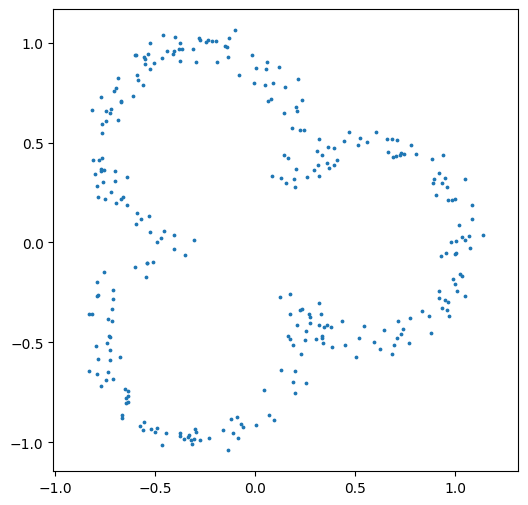

In [13]:
rng = np.random.default_rng(35)
num_points=300
points = rng.uniform(low=0.0, high=2*np.pi, size=num_points)
points = np.sqrt(np.abs(np.cos(1.5*points))+.1)[:,None] * np.column_stack((np.cos(points), np.sin(points))) + rng.normal(scale=0.05, size=(num_points,2))
# points[: 1] += points[:,0]**2
# points = rng.uniform(low=0.0, high=1.0, size=(num_points,2)) * 1000

plt.figure(figsize=(6,6))
plt.scatter( points[:,0], points[:,1], s = 3)
plt.axis('equal')

In [14]:
loop_forest = LoopForest(points, print_info=True)

Alpha complex generated in 0.0014668750009150244
Filtration processed in 0.0010966250010824297
Forest succesfully computed in 0.006653917000221554 sec
Reducing the forest
Number of nodes before reduction: 1162
Reduction complete in 0.00028820800071116537 sec
Number of nodes after reduction: 508
Computing Barcode
Barcode computation completed in 0.00020120800036238506 sec


## Barcode

The H1 barcode of the point cloud is stored in the LoopForest object loop_forest at loop_forest.barcode as a list of Bar objects. 
Each Bar object bar has attributes bar.birth, bar.death and bar.cycle_reps
The progession of optimal cycle representatives is stored in bar.cycle_reps as list of Loop objects.

Each Loop object has a vertex list which are saves as list of indices in loop.vertex_list. 
The point coordinates can be accessed via loop_forest.point_cloud[vertex] for vertex in loop.vertex_list
Additionally, each Loop has a loop.active_start and loop.active_end attribute which give the interval in which this cycle representative is optimal.


Bar atributes: Birth 0.06814696781124369, Death 0.07914329330704965, 
and cycle reps
[ 19 108 139 166 209  34] active from 0.06814696781124369 to 0.07178283496349082
[ 19 108 139 166 209] active from 0.07178283496349082 to 0.07450831138009471
[ 19 108 139 166] active from 0.07450831138009471 to 0.0770808591513121
[ 19 108 166] active from 0.0770808591513121 to 0.07914329330704965

Bar atributes: Birth 0.06252859828022725, Death 0.0625558342817887, 
and cycle reps
[263 236 188] active from 0.06252859828022725 to 0.0625558342817887

Bar atributes: Birth 0.07948119853311776, Death 0.09127534600605967, 
and cycle reps
[ 89 290 153 212] active from 0.07948119853311776 to 0.08942789006502953
[ 89 290 153] active from 0.08942789006502953 to 0.09127534600605967

Bar atributes: Birth 0.07167338873266946, Death 0.0787190622399086, 
and cycle reps
[134  38  45 242] active from 0.07167338873266946 to 0.07861881862684711
[134  45 242] active from 0.07861881862684711 to 0.0787190622399086


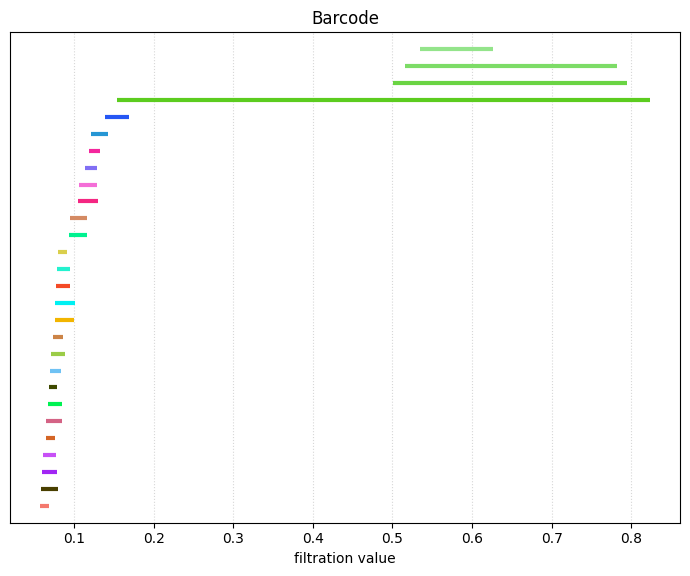

<Axes: title={'center': 'Barcode'}, xlabel='filtration value'>

In [15]:
for bar in list(loop_forest.barcode)[6:10]:
    print(f"\nBar atributes: Birth {bar.birth}, Death {bar.death}, \nand cycle reps")
    for loop in bar.cycle_reps:
        print(f'{loop.vertex_list} active from {loop.active_start} to {loop.active_end}')
        cycle_rep = np.array([loop_forest.point_cloud[vertex] for vertex in loop.vertex_list])

loop_forest.plot_barcode(min_bar_length=0.01)

## Plotting functions for Loop Forest Class

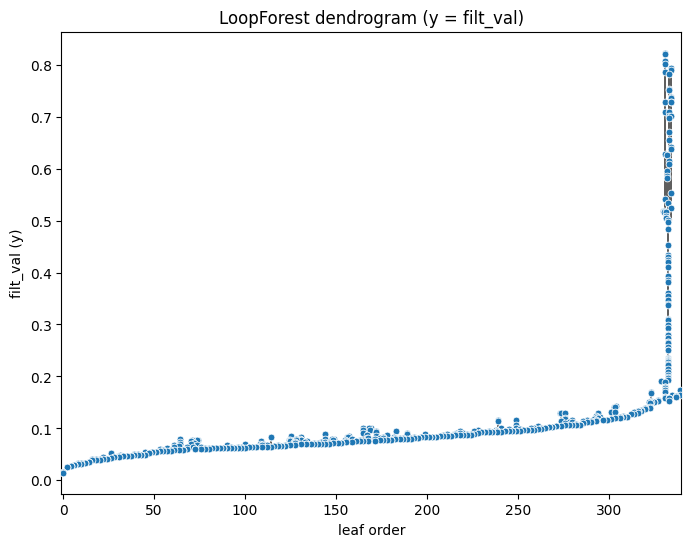

In [16]:
ax = loop_forest.plot_dendrogram()
plt.show()

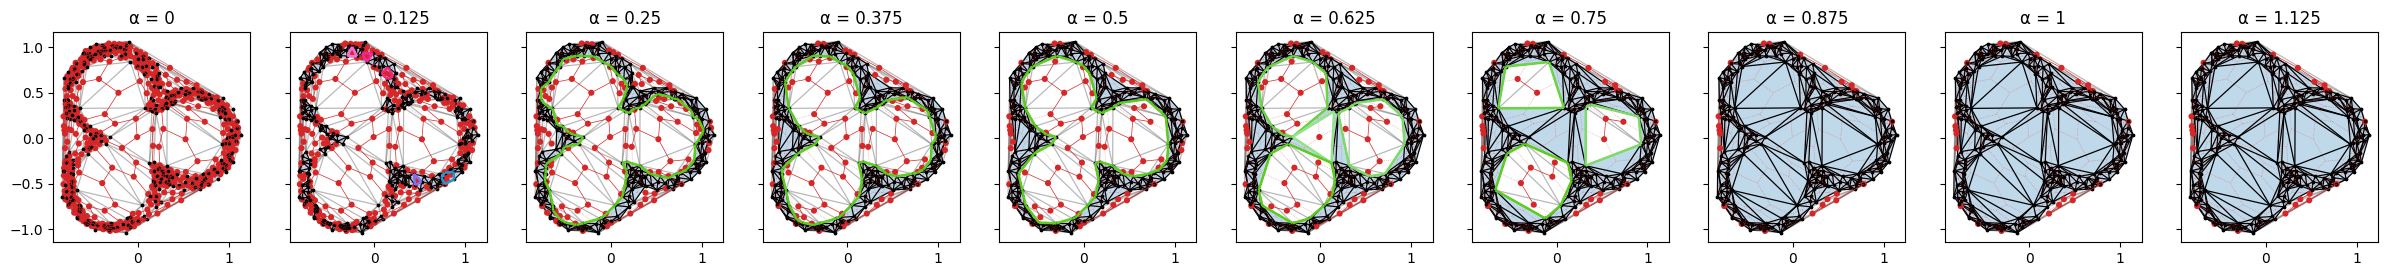

In [17]:
alpha_max = max(v for (_,v) in loop_forest.filtration)
#Two Coloring schemes
#coloring = 'forest' is default and colors loops in same forest very similarly
fig, axs = plt.subplots(1, 10, sharey=True, figsize=(10*3,3))
for k in range(0,10):
    loop_forest.plot_at_filtration_with_dual(.125*k, ax=axs[k])

for k in range(0,10):
    ax = loop_forest.plot_at_filtration_with_dual(.125*k)
    ax.get_figure().savefig(f'plots/loop_forest_dual_filt_{.125*k:.3f}.pdf', transparent=True)
    plt.close(ax.get_figure())

# fig.show()
#coloring = 'bars' cycles through different colors from longest to shortes bars
#forces long bars to have different colors even if they are in the same tree
# for k in range(2,5):
#     loop_forest.plot_at_filtration(50*k, figsize=(7,7),coloring='bars')

# Create Animation

In [18]:
#if filename is given, animation is saved
""" anim, fig = loop_forest.animate_filtration(
    filename = "animations/random_points.mp4",
    fps=20,
    frames=200,
    plot_kwargs=dict(coloring="forest", point_size=2),
    with_barcode=False
) """

' anim, fig = loop_forest.animate_filtration(\n    filename = "animations/random_points.mp4",\n    fps=20,\n    frames=200,\n    plot_kwargs=dict(coloring="forest", point_size=2),\n    with_barcode=False\n) '

In [19]:
#optional: show with barcode (barcode function still needs to be reworked)
""" anim, fig = loop_forest.animate_filtration(
    filename = "animations/random_points_barcode.mp4",
    fps=20,
    frames=200,
    plot_kwargs=dict(coloring="forest", point_size=2),
    with_barcode=True
) """

' anim, fig = loop_forest.animate_filtration(\n    filename = "animations/random_points_barcode.mp4",\n    fps=20,\n    frames=200,\n    plot_kwargs=dict(coloring="forest", point_size=2),\n    with_barcode=True\n) '

# Measurement Functions and Barcode functionals

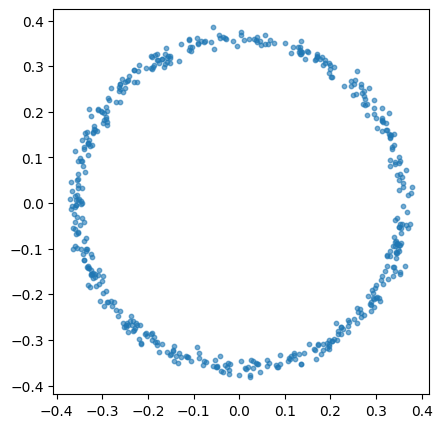

In [20]:
from point_cloud_sampling import sample_noisy_circle

circle = sample_noisy_circle(500, noise_std=0.01, seed=4, radius = 0.36)

# Visualization
plt.figure(figsize=(5,5))
plt.scatter(circle[:,0], circle[:,1], s=10, alpha=0.6)
plt.gca().set_aspect("equal")
plt.show()

In [21]:
circle_forest = LoopForest(circle,print_info=True)

Alpha complex generated in 0.002281542001583148
Filtration processed in 0.001595624999026768
Forest succesfully computed in 0.01347979199999827 sec
Reducing the forest
Number of nodes before reduction: 1930
Reduction complete in 0.00029512499895645306 sec
Number of nodes after reduction: 808
Computing Barcode
Barcode computation completed in 0.00024329200095962733 sec


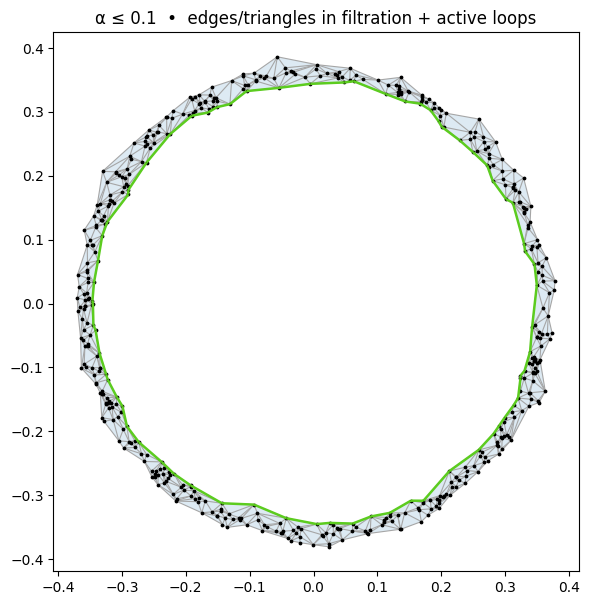

In [22]:
ax = circle_forest.plot_at_filtration(0.1)
plt.show()

In [23]:
#import polygon path measurement functions
from cycle_rep_vectorisations import polygon_area, polygon_length, polygon_length_squared_area_ratio, polygon_length_squared_area_ratio_normalized, curvature_excess

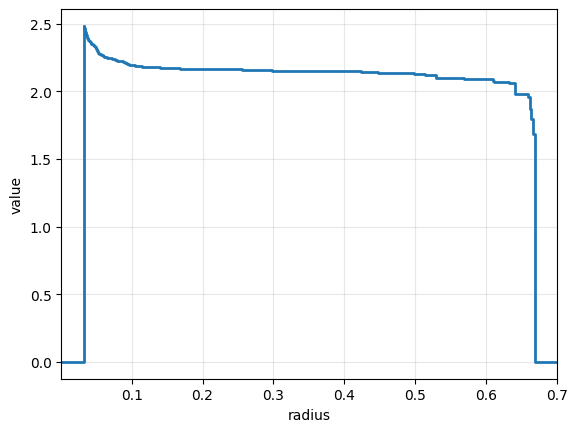

In [24]:
#extract longest bar in barcode
bar= circle_forest.max_bar()

ax = circle_forest.plot_barcode_measurement(polyhedral_path_func=polygon_length, bar=bar) #if no bar is given, maximal bar is automatically used
plt.show()

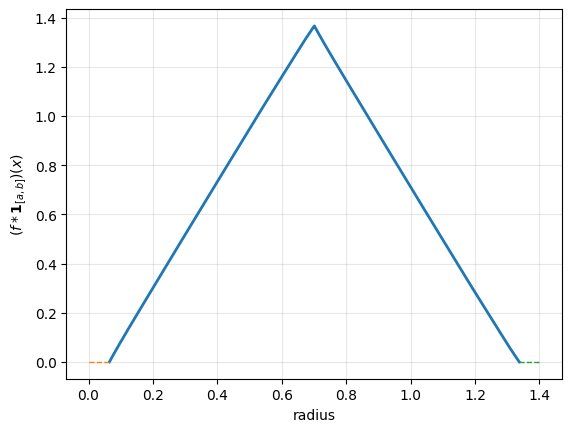

In [25]:
#plotting generalized landscape which is convolution of measurement function with interval indicator function
ax, _ = circle_forest.plot_generalized_interval_landscape(polyhedral_path_func=polygon_length)
plt.show()

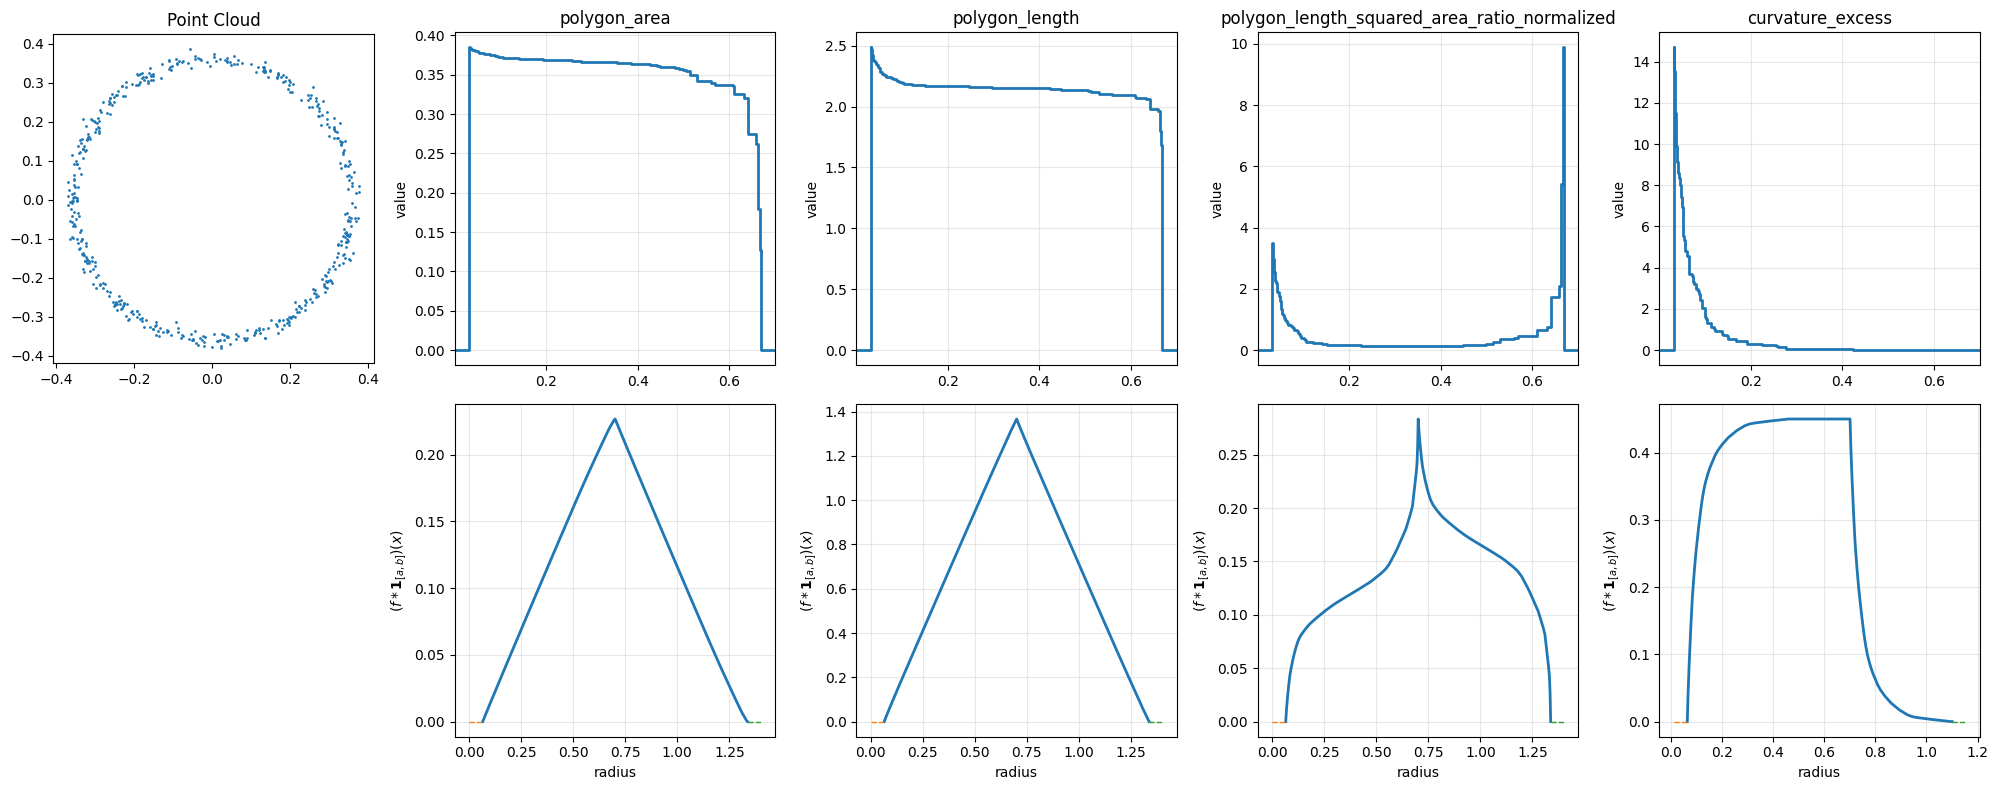

In [26]:
#generate plot of mutliple measurement functions and their landscapes
axes = circle_forest.plot_landscape_subplots(polyhedral_path_funcs=[polygon_area, polygon_length, polygon_length_squared_area_ratio_normalized, curvature_excess])
plt.show()

# Comparing different examples on longest bars

In [27]:
from point_cloud_sampling import sample_noisy_star

star = sample_noisy_star(1000, spikes=5, amplitude=0.5, noise_std=0.03, seed=42, radius =0.75)
star_forest = LoopForest(star)

In [28]:
from point_cloud_sampling import sample_noisy_ellipse

ellipse = sample_noisy_ellipse(1000, a=0.9,b=0.4, noise_std = 0.03)
ellipse_forest = LoopForest(ellipse)

In [29]:
from point_cloud_sampling import sample_noisy_circle_with_tendril

circle_line = sample_noisy_circle_with_tendril(1000, radius=0.5, tendril_length=0.3, tendril_fraction=0.05, noise_std=0.02, tendril_width_deg=2)
circle_line_forest = LoopForest(circle_line)

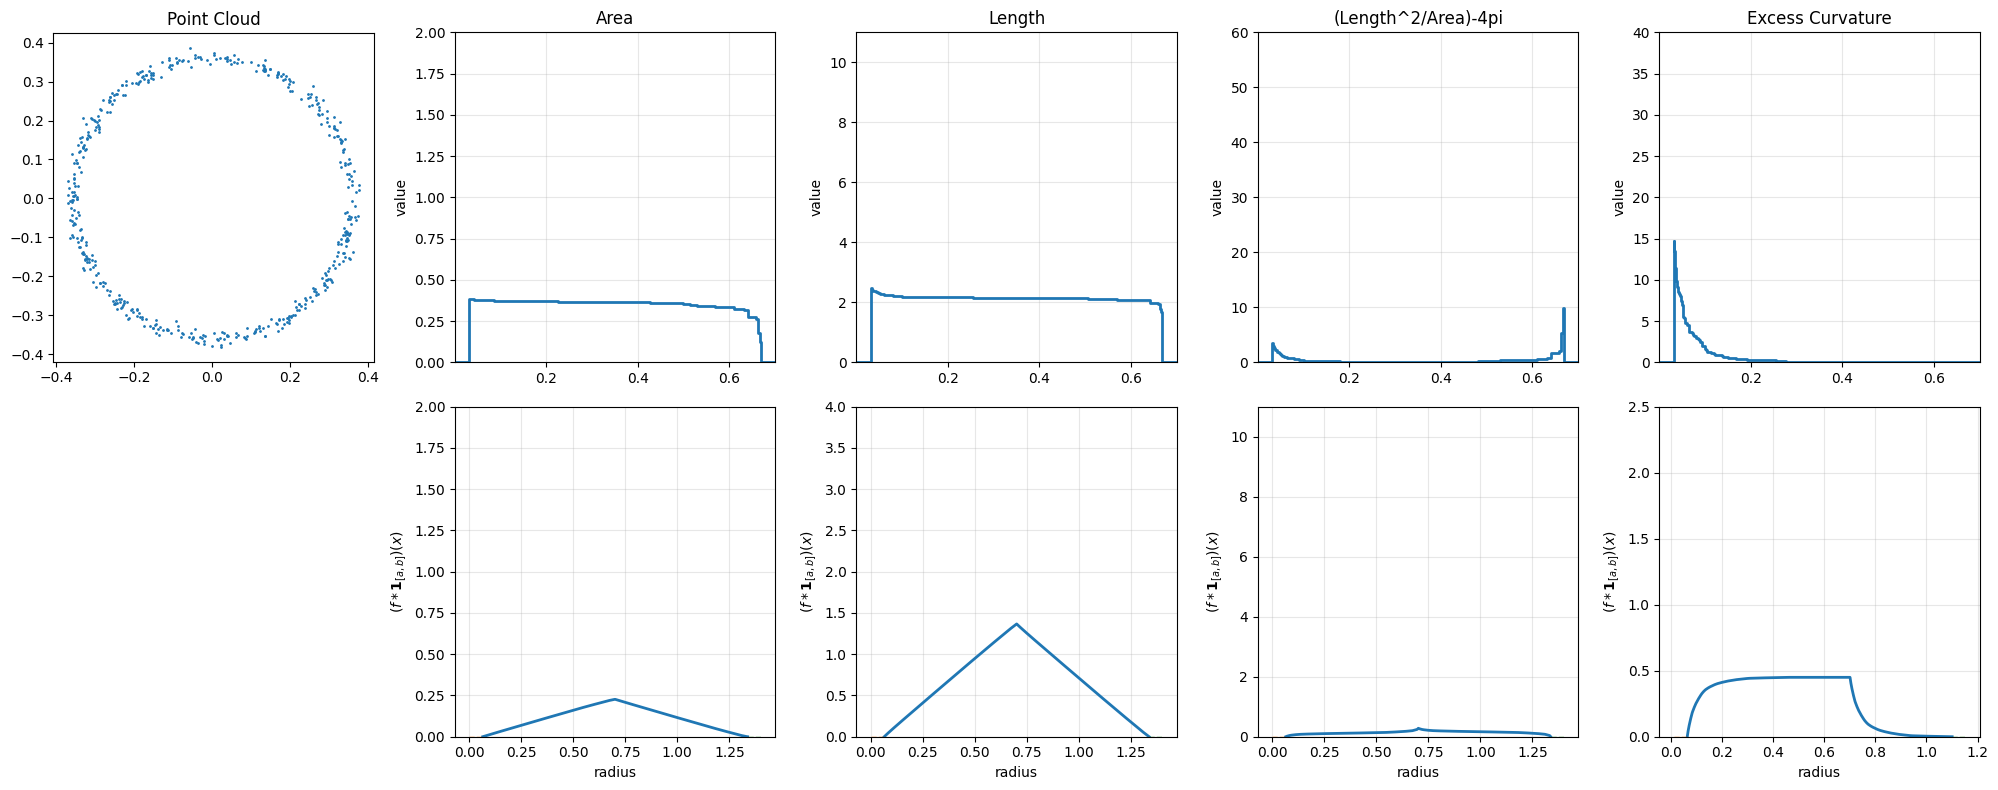

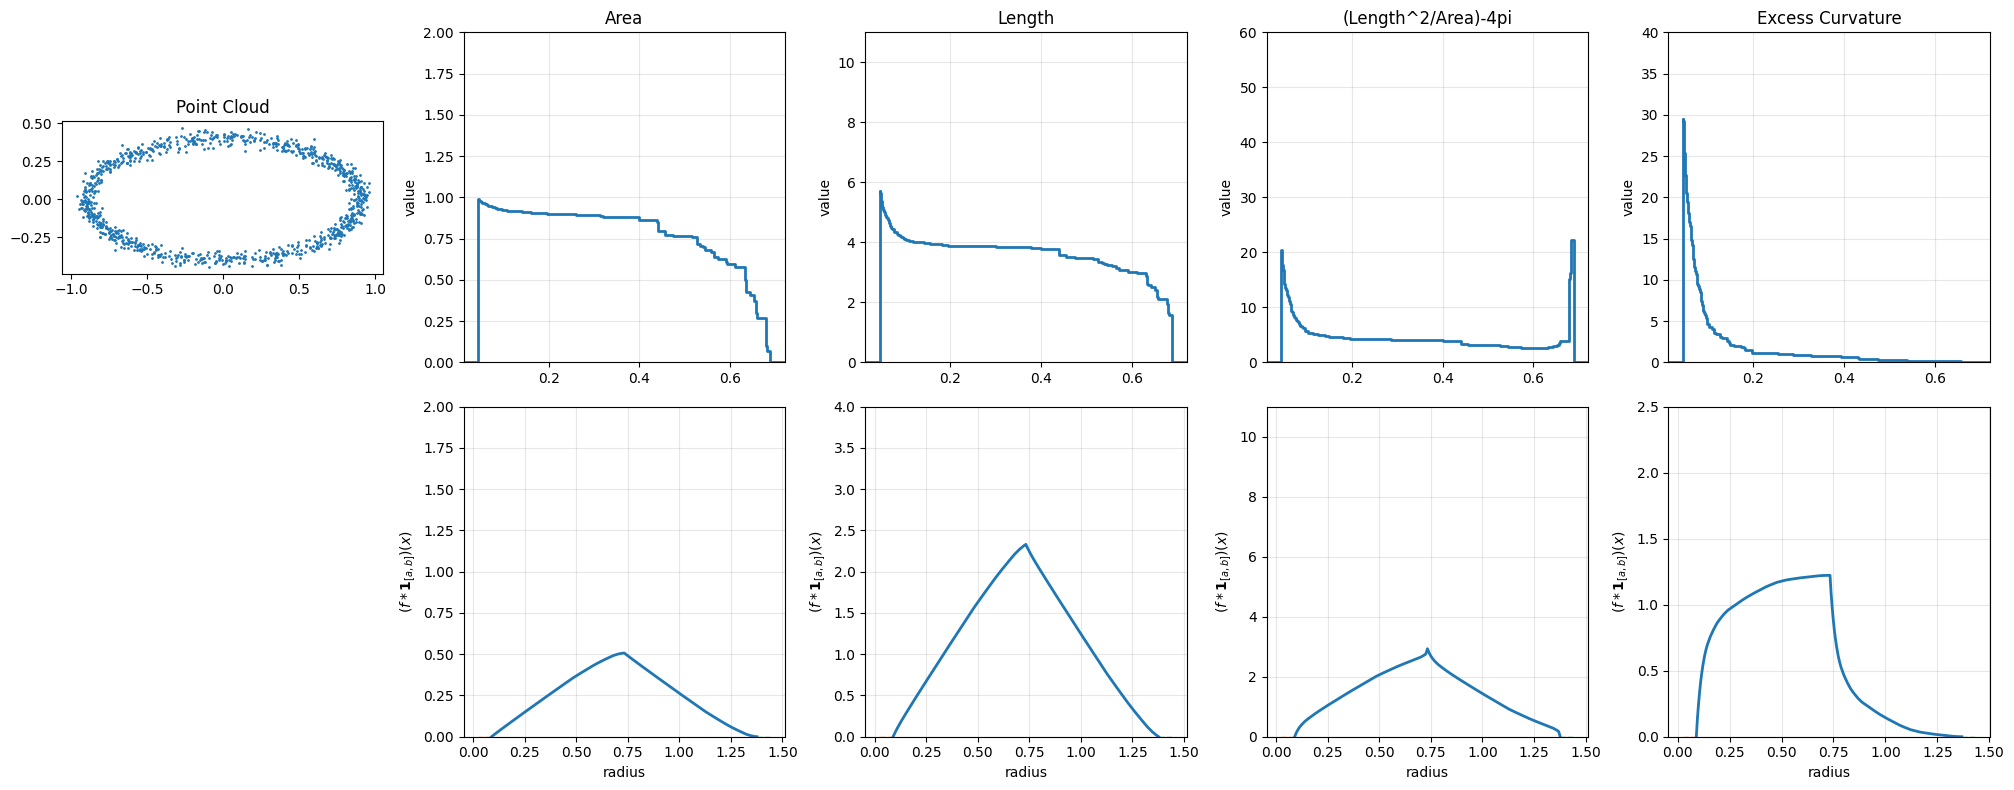

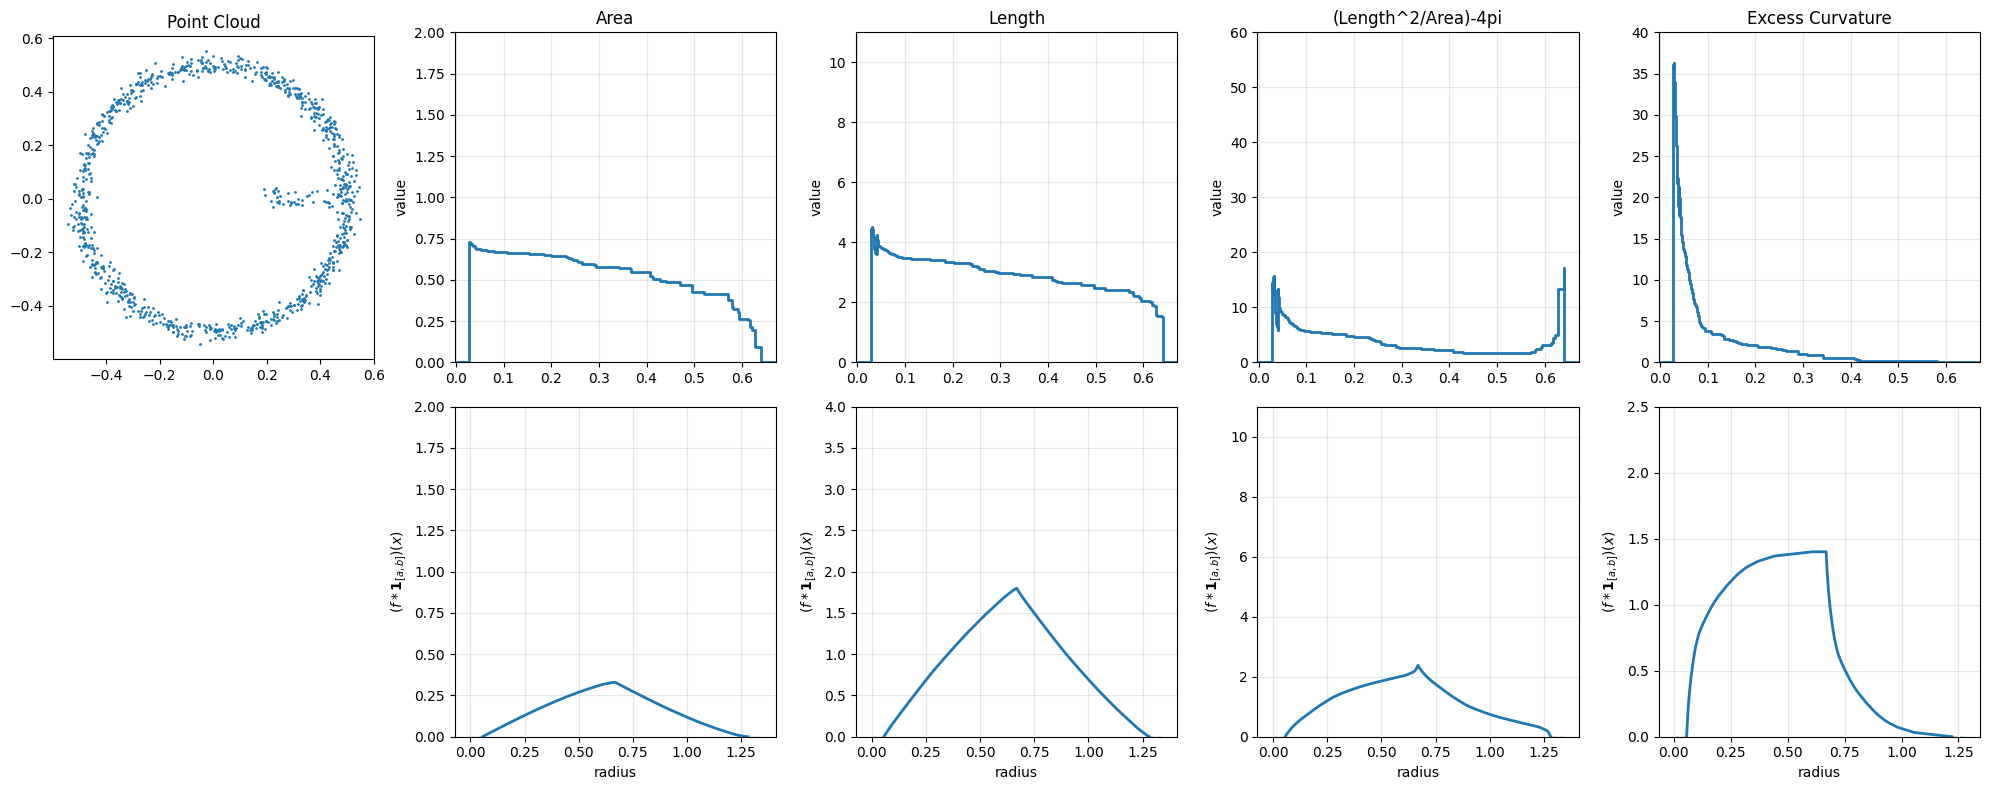

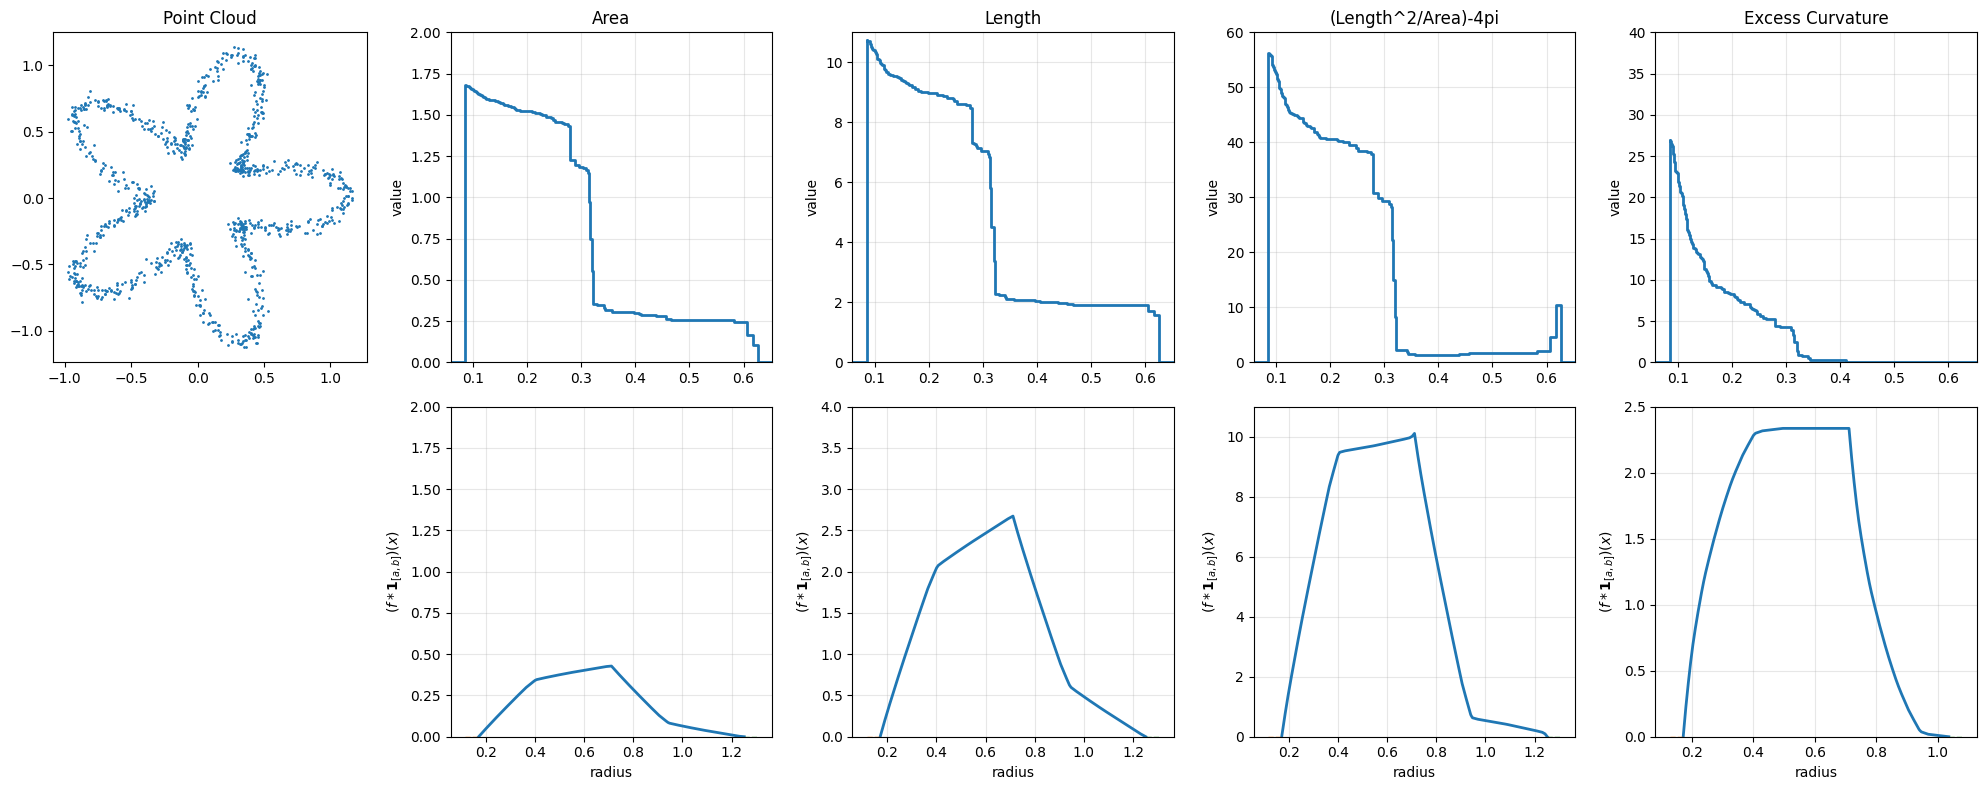

In [30]:
#yrange_dict to make y-axis consistent between plots
yrange_dict = {(0,1): (0.0,2),
               (0,2):(0,11),
               (0,3):(0,60),
               (0,4): (0,40),
               (1,1): (0.0,2),
               (1,2):(0,4),
               (1,3):(0,11),
               (1,4): (0,2.5)}

column_titles = ["Area", "Length","(Length^2/Area)-4pi", "Excess Curvature"]

for forest in [circle_forest, ellipse_forest, circle_line_forest, star_forest]:
    axes = forest.plot_landscape_subplots(polyhedral_path_funcs=[polygon_area, polygon_length, polygon_length_squared_area_ratio_normalized, curvature_excess], 
                                       yrange_dict=yrange_dict, 
                                       column_titles=column_titles)
    plt.show()


# Generalized Persistence Landscapes

In [31]:
landscapes = star_forest.compute_generalized_landscape_family(
    polyhedral_path_func=polygon_length,
    max_k=6,
    num_grid_points=1000,
    min_bar_length=0.05,   # ignore very short bars
    label="length",
)

landscapes = star_forest.compute_generalized_landscape_family(
    polyhedral_path_func=polygon_area,
    max_k=6,
    num_grid_points=1000,
    min_bar_length=0.05,   # ignore very short bars
    label="area",
)

compute_generalized_landscape_family computes a GeneralizedLandscapeFamily object. It is both returned and saved in LoopForest.landscape_families[label]. 

The k-th level landscape of a landscape family can accessed via GeneralizedLandscapeFamily.landscapes[k] and is saved as a PiecewiseLinearFunction object.

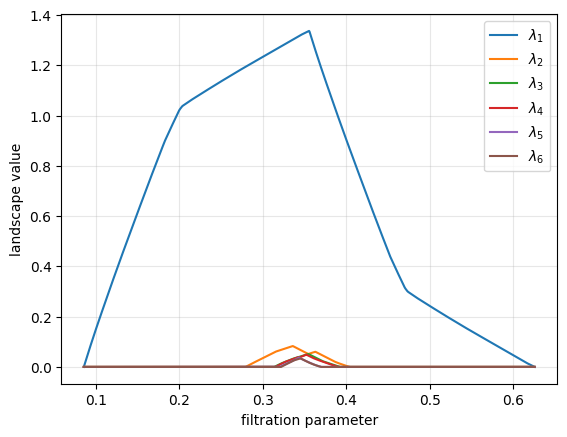

In [32]:
fig, ax = plt.subplots()

for k in range(1,7):    
    level_k_landscape = star_forest.landscape_families["length"].landscapes[k]
    ax.plot( level_k_landscape.xs, level_k_landscape.ys, label=fr"$\lambda_{k}$")

ax.set_xlabel("filtration parameter")
ax.set_ylabel("landscape value")
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

<Axes: title={'center': 'Generalized landscapes of area'}, xlabel='filtration value', ylabel='landscape value'>

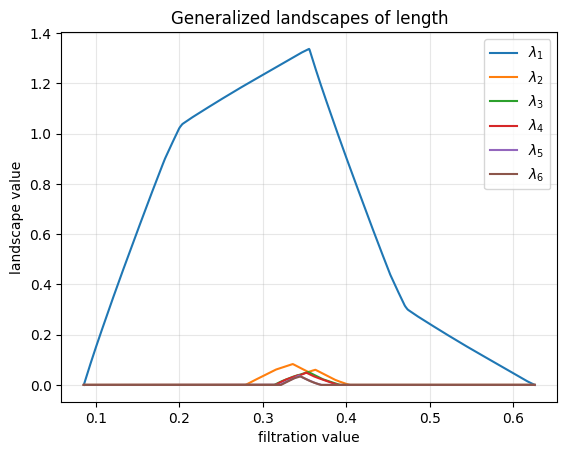

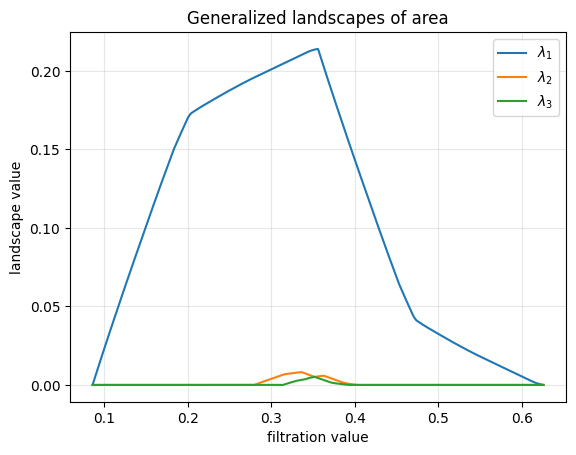

In [33]:
# There also is a direct plotting tool
star_forest.plot_landscape_family(label="length")
star_forest.plot_landscape_family(label="area", ks= [1,2,3])

## Comparing Landscapes between Point Clouds

<Axes: title={'center': 'Comparison of length_squared_area_ratio_normalized $\\lambda_1$ across forests (k=1)'}, xlabel='filtration value', ylabel='$\\lambda_1$'>

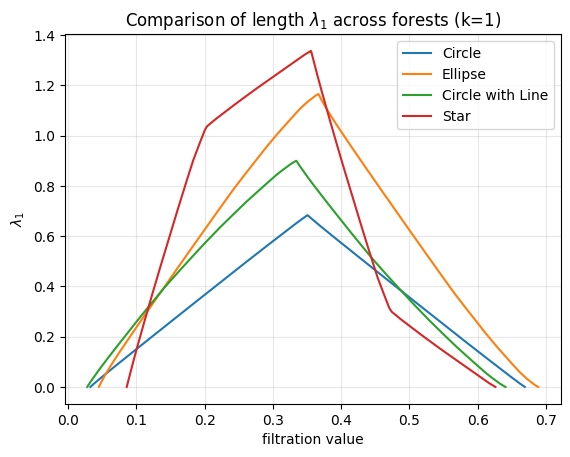

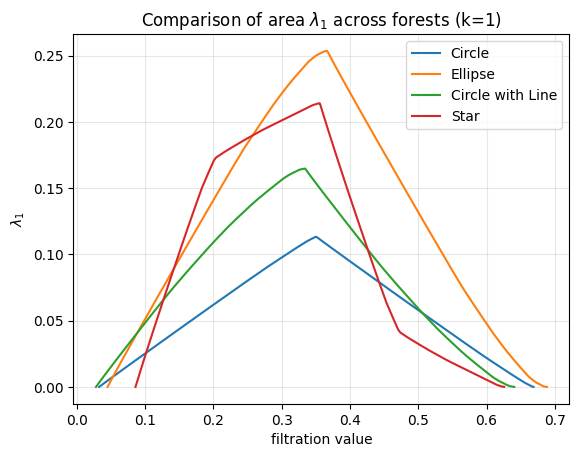

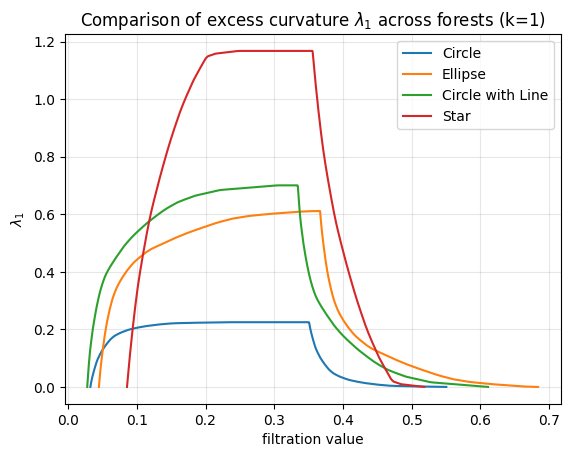

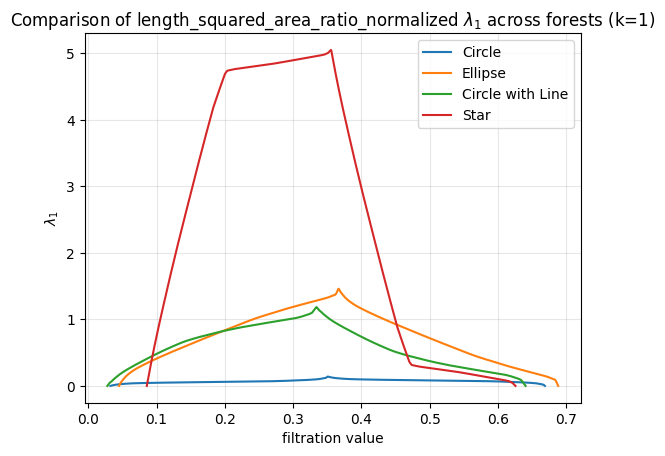

In [34]:
forests = [circle_forest,ellipse_forest,circle_line_forest,star_forest]

for forest in forests:
    forest.compute_generalized_landscape_family(
    polyhedral_path_func=polygon_length,
    max_k=6,
    num_grid_points=1000,
    min_bar_length=0.05,   # ignore very short bars
    label="length",
    )

    forest.compute_generalized_landscape_family(
    polyhedral_path_func=polygon_area,
    max_k=6,
    num_grid_points=1000,
    min_bar_length=0.05,   # ignore very short bars
    label="area",
    )

    forest.compute_generalized_landscape_family(
    polyhedral_path_func=curvature_excess,
    max_k=6,
    num_grid_points=1000,
    min_bar_length=0.05,   # ignore very short bars
    label="excess curvature",
    )

    forest.compute_generalized_landscape_family(
    polyhedral_path_func=polygon_length_squared_area_ratio_normalized,
    max_k=6,
    num_grid_points=1000,
    min_bar_length=0.05,   # ignore very short bars
    label="length_squared_area_ratio_normalized",
    )
    

from LoopForest import plot_landscape_comparison

plot_landscape_comparison(forests, label = "length", k=1, forest_labels = ["Circle","Ellipse", "Circle with Line", "Star"])
plot_landscape_comparison(forests, label = "area", k=1, forest_labels = ["Circle","Ellipse", "Circle with Line", "Star"])
plot_landscape_comparison(forests, label = "excess curvature", k=1, forest_labels = ["Circle","Ellipse", "Circle with Line", "Star"])
plot_landscape_comparison(forests, label = "length_squared_area_ratio_normalized", k=1, forest_labels = ["Circle","Ellipse", "Circle with Line", "Star"])

## Machine Learning Vectorisation Pipeline

In [35]:
from LoopForest import MultiLandscapeVectorizer

# 1. define functions
poly_funcs = [polygon_length,polygon_area,curvature_excess,polygon_length_squared_area_ratio_normalized]

# 2. Collect LoopForest objects
forests_train = [circle_forest,circle_line_forest,ellipse_forest, star_forest]  # list of LoopForest, these need to be computed depending on the given task you are working in
forests_test  = [loop_forest]

# 3. Create the vectoriser
vec = MultiLandscapeVectorizer(
    poly_funcs=poly_funcs,
    max_k=3,
    num_grid_points=64,
    min_bar_length=0.05,
    include_stats=True,  # adds L1/L2 norms per level
)

# 4. Fit on training forests (learns common grid)
vec.fit(forests_train)

# 5. Vectorise datasets
X_train = vec.transform(forests_train)
X_test  = vec.transform(forests_test)

# 6. Use X_train / X_test in any ML model
from sklearn.ensemble import RandomForestClassifier
y_train = [0,1,2,3] #set categories for forest_train/X_train (rightn now this is nonsense)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)